# Exercise 2
Random Graphs, Regular Graphs and Small World Networks

## Study the properties of a random graph (1.5 hours).
a. Implement a Python routine L_C_Random that returns the average value of the coefficients C (clustering coefficient ) and L (characteristic path) and the order of the largest connected component of a set of n_graph random graphs of n nodes and probability p . The format of the function must be
[ l, c , tam ] = L_C_Aleatorio ( n_graph, n, p )

In [1]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import math as math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_graph_metrics(graph):
    largest_cc = max(nx.connected_components(graph), key=len)   
    largest_connected_subgraph = graph.subgraph(largest_cc)
    if not nx.is_connected(graph): 
        subgraph = largest_connected_subgraph
    else:
        subgraph = graph
    return nx.average_clustering(graph),\
           nx.average_shortest_path_length(subgraph),\
           largest_connected_subgraph.order()
    
def l_c_random(n_graph, n, p):
    acum_c = 0
    acum_l = 0
    acum_o = 0
    for i in range(0, n_graph - 1):
        graph = nx.gnp_random_graph(n, p)
        c, l, o = get_graph_metrics(graph)
        acum_c += c
        acum_l += l
        acum_o += o
    return [acum_c/n_graph, acum_l/n_graph, acum_o/n_graph]

metrics = l_c_random(5, 100, 0.1)
print(metrics)

[0.076436128577305, 1.8004444444444445, 80.0]


b. Use the previous routine, to plot the behavior of L, C and the order of the largest
connected component for different values of the probability p and a fixed number of
nodes.
Use n = 800 , n_graph = 100 and the following values of p

$ [0,0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0] $



In [4]:
c_metrics = []
l_metrics = []
o_metrics = []
n_graph = 100
n = 800

p_set = [0,0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0]
for p in p_set:
    print("Running", p)
    [c, l, o] = l_c_random(n_graph, n, p)
    c_metrics.append(c)
    l_metrics.append(l)
    o_metrics.append(o)
    
print(c_metrics)
print(l_metrics)
print(o_metrics)

# Serialize and dump results as backup
import pickle

binary_file = open('c_metrics.bin',mode='wb')
pickle.dump(c_metrics, binary_file)
binary_file.close()

binary_file = open('l_metrics.bin',mode='wb')
pickle.dump(l_metrics, binary_file)
binary_file.close()

binary_file = open('o_metrics.bin',mode='wb')
pickle.dump(o_metrics, binary_file)
binary_file.close()

Running 0
Running 0.0001
Running 0.0003
Running 0.0006
Running 0.001
Running 0.003
Running 0.006
Running 0.01
Running 0.03
Running 0.06
Running 0.1
Running 0.3
Running 0.6
Running 1.0
[0.0, 0.0, 0.0, 3.75e-05, 0.00011666666666666665, 0.002045951479076479, 0.00586383288280347, 0.009689305543387596, 0.02966525792587014, 0.05936722235594138, 0.09901122358460329, 0.29710067677141755, 0.5938933809886913, 0.99]
[0.0, 1.334999999999999, 1.888515873015873, 3.002485887830778, 5.501815464018222, 7.214462937083598, 4.3866143473518475, 3.413741711625743, 2.4184853566958706, 1.9727301627033782, 1.8813282227784724, 1.682917083854819, 1.386102315394243, 0.99]
[0.99, 3.03, 5.16, 10.18, 28.28, 694.63, 785.12, 791.83, 792.0, 792.0, 792.0, 792.0, 792.0, 792.0]


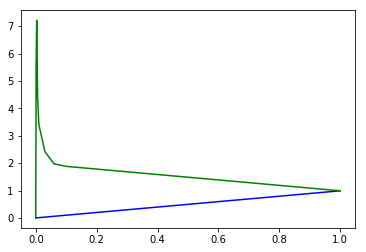

In [16]:
# Deserialize
binary_file = open('c_metrics.bin',mode='rb')
c_metrics_new = pickle.load(binary_file)
binary_file.close()

binary_file = open('l_metrics.bin',mode='rb')
l_metrics_new = pickle.load(binary_file)
binary_file.close()

binary_file = open('o_metrics.bin',mode='rb')
o_metrics_new = pickle.load(binary_file)
binary_file.close()

plt.plot(p_set, c_metrics_new, color="blue")
plt.plot(p_set, l_metrics_new, color="green");
#plt.plot(p_set, o_metrics, color="blue")

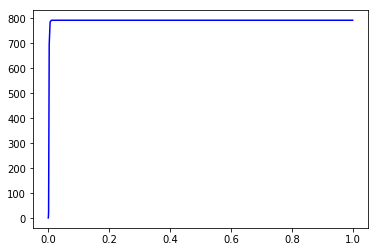

In [17]:
plt.plot(p_set, o_metrics_new, color="blue");

# Backlog topics


b. Use the previous routine, to plot the behavior of L, C and the order of the largest
connected component for different values of the probability p and a fixed number of
nodes.
Use n = 800 , n_graph = 100 and the following values of p
[ 0,0,0001,0,0003,0,0006, 0.001.0.003.0.006.0.01.0.03.0.06, 0 .1.0.3.0.6.1.]
Can occur what, in Some cases, L take the value infinite (assign them the same value as
the maximum) What happens in the graph for what L take that value?
Draw a graph that describes the behaviour of these three parameters as a function of p.
For what probabilities p he produce changes phase in the behavior the parameters L,
C and order of the largest connected component ?
Regular networks and small world (1.5h)
a. Implement a Python routine that generates a directed and weighted onedimensional mesh (each branch must take a random value according to
a normal (0,1) of n nodes, where each node is connected to its k neighbours left (k/
2) and right (k/2) . The format of the routine should be:
G = mesh_1d_directed_weighted (n, k )
Calculate the clustering index C and the characteristic path L for a mesh of n = 800
nodes and k = 8 neighbours. Is the clustering index and the characteristic path
comparable to that of a random graph not directed or weighted equivalent?
b. Using the NetworkX function watts_strogatz_ graph ( n,k,p) implement a
Python routine L_C_small_world ( n_graph , n, k, p ) that returns the average value
of the coefficients C ( average clustering index ) and L (characteristic path) for a set
of n_graph Small World graphs . The format of the function must be
[ l, c ] = L_C_ Small_World ( n_graph, n , k , p )
c. Using the above routine, generate a graph with the behaviour of C and L for
different values of probability p and a fixed number of nodes and branches.
Take N = 800, k = 8 and the following p values
[ 0.0.0001, .0.0003, .0.0006, 0.001.0.003.0.006.0.01.0.03.0.06, 0.1.0.3.0.6.1.]
For what probabilities p phase changes occur in behavior parameters L and C?
Between what values of p you would say that there is the Small- World zone for these
values of N and k. Does the p value observed correspond to the theoretical p value for
the phase change in the behaviour of the characteristic path?
Compare the graphs obtained from C and L with the corresponding theoretical graphs.
With the data you obtained in exercise 1. Would you say that the protein interaction
network of Caernobidis Elegans could be considered a small world network (Reason the
answer)?